# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestRegressor as RFR    # el modelo , el alias es cosa mia

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia

from sklearn.datasets import load_diabetes   # dataset

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [4]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error as mse

linreg=LinReg()

linreg.fit(X_train, y_train)

y_pred1= linreg.predict(X_test)

y_pred2= linreg.predict(X_train)



## 3. Calculate and print R-squared for both the training and the testing set.

In [5]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred1)


0.765746594359112

In [6]:
r2(y_train, y_pred2)

0.7295941389826617

## 4. Calculate and print mean squared error for both the training and the testing set.

In [7]:
mse(y_train,y_pred2)

22.534576008227237

In [8]:
mse(y_test,y_pred1)

20.770684784270053

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_absolute_error as mae 

mae(y_test, y_pred1)

3.425181871853358

In [10]:
mae(y_train,y_pred2)

3.332891470689542

## Classification Model Evaluation

In [25]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [26]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [31]:
from sklearn.linear_model import LogisticRegression as LogReg


In [32]:
logreg=LogReg()
logreg.fit(X_train, y_train)

y_pred1=logreg.predict(X_test)

y_pred2= logreg.predict(X_train)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [34]:
accuracy_score(y_test, y_pred1)*100

93.33333333333333

In [35]:
accuracy_score(y_train, y_pred2)*100

96.66666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [40]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred1)*100

95.23809523809524

In [39]:
balanced_accuracy_score(y_train, y_pred2)*100

96.48148148148148

## 10. Calculate and print the precision score for both the training and the testing set.

In [45]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred1, average='micro')

0.9333333333333333

In [46]:
prec(y_train, y_pred2, average='micro')

0.9666666666666667

## 11. Calculate and print the recall score for both the training and the testing set.

In [48]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred1, average='micro')

0.9333333333333333

## 12. Calculate and print the F1 score for both the training and the testing set.

In [49]:
rec(y_train, y_pred2, average='micro')

0.9666666666666667

## 13. Generate confusion matrices for both the training and the testing set.

In [54]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test, y_pred1)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 12]])

In [57]:
cm(y_train, y_pred2)

array([[44,  0,  0],
       [ 0, 38,  2],
       [ 0,  2, 34]])

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

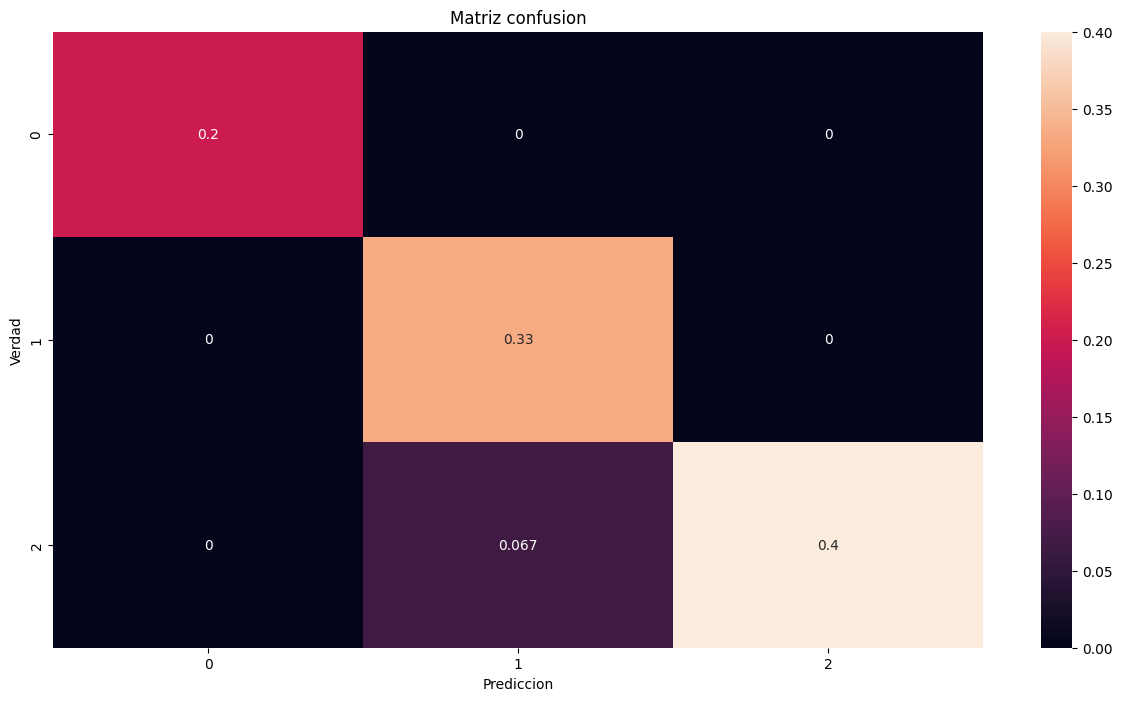

In [59]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred1)/sum(sum(cm(y_test, y_pred1))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

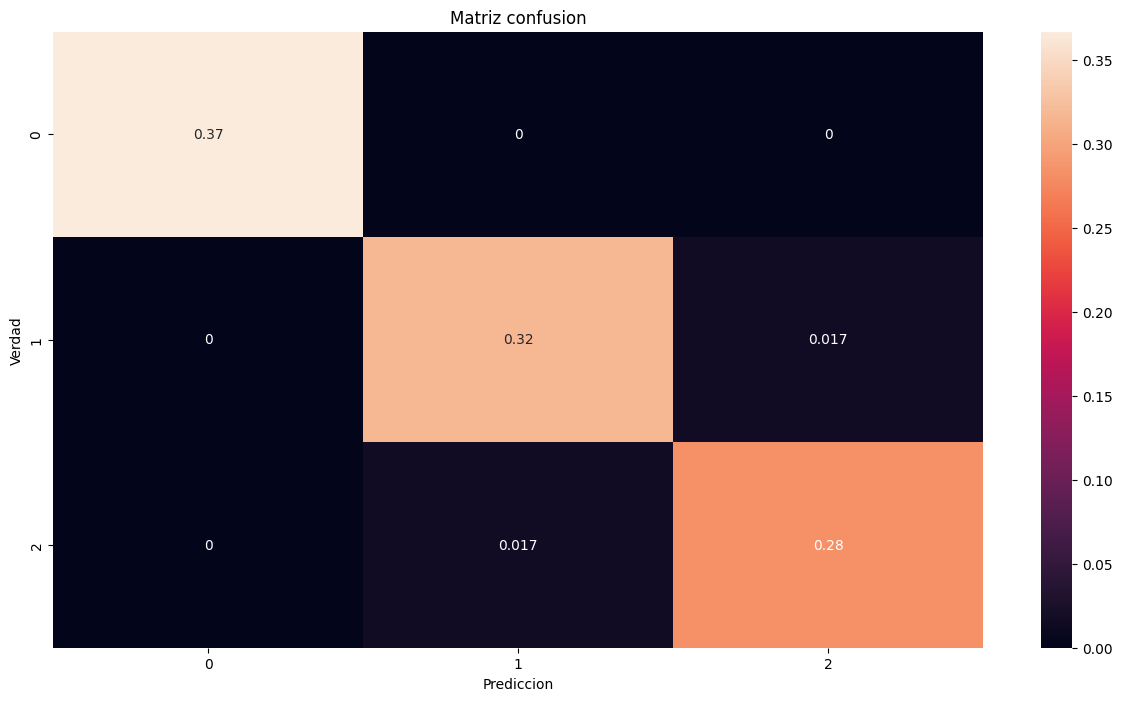

In [60]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred2)/sum(sum(cm(y_train, y_pred2))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.